In [224]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 

from matplotlib import pyplot as plt

import utils.helpers as hp

In [225]:
def create_paragraph_dict(path:str, 
                          lines_to_skip:int, 
                          book_title:str, 
                          cut_num:int = 200,
                          **kwargs)->dict:

    cleaner_functions = {'pyrates': hp.pre_process_pyrates,
                         'rc': hp.pre_process_rc,
                         'wj': hp.pre_process_weekly_journal,
                         'gt': hp.pre_process_gt}
    
    clean_func = cleaner_functions[book_title]

    with open(path, 'r') as file:
        for _ in range(lines_to_skip):
            next(file)
        text = file.read()

    paragraphs = text.split('\n\n')

    paragraph_dict = {}

    for i, paragraph in enumerate(paragraphs):
        clean_p = clean_func(paragraph, **kwargs)
        if len(clean_p.split()) >= cut_num:
            paragraph_dict[book_title + '_' + str(i)] = clean_p


    return paragraph_dict

In [226]:
pyrates_paragraph_dict = create_paragraph_dict(path = '../books/gen_history_of_the_pyrates.txt',
                                               lines_to_skip=52,
                                               book_title='pyrates',
                                               cut_num=150)

In [227]:
len(pyrates_paragraph_dict)

40

In [228]:
print(pyrates_paragraph_dict['pyrates_67'])

times marius sylla rome greatest strength yet torn pieces factions two great men every thing concerned publick good altogether neglected certain pyrates broke cicilia country asia minor situate coast mediterranean betwixt syria east whence divided mount tauris armenia minor west beginning mean inconsiderable two three ships men cruised greek islands taking ships ill arm  weakly defended however taking many prizes soon increased wealth power first action  made noise taking julius cæsar yet youth obliged fly cruelties sylla sought life went bithinia sojourned nicomedes king country return back sea met taken pyrates near island pharmacusa pyrates barbarous custom tying prisoners back back throwing sea supposing cæsar person high rank purple robes number attendants thought would profit preserve hopes receiving great sum ransom therefore told liberty provided would pay twenty talents judg  high demand money three thousand six hundred pounds sterling smiled accord promised fifty talents plea

In [229]:
rc_paragraph_dict = create_paragraph_dict(path = '../books/robinson_crusoe.txt',
                                               lines_to_skip=12,
                                               book_title='rc',
                                               cut_num=150)

In [230]:
len(rc_paragraph_dict)

35

In [231]:
print(rc_paragraph_dict['rc_13'])

slept well night sea-sick cheerful looking wonder upon sea rough terrible day could calm pleasant little time lest good resolutions continue companion indeed enticed away comes well bob says clapping upon shoulder warrant frighted want last night blew capful wind —a capful call said terrible storm.—a storm fool replied call storm nothing give us good ship sea-room think nothing squall wind youre fresh-water sailor bob come let us make bowl punch well forget see charming weather make short sad part story went old way sailors punch made made drunk one nights wickedness drowned repentance reflections upon past conduct resolutions future word sea returned smoothness surface settled calmness abatement storm hurry thoughts fears apprehensions swallowed sea forgotten current former desires returned entirely forgot vows promises made distress found indeed intervals reflection serious thoughts endeavour return sometimes shook roused distemper applying drinking company soon mastered return fits 

In [232]:
gt_paragraph_dict = create_paragraph_dict(path = '../books/gullivers_travels.txt',
                                               lines_to_skip=28,
                                               book_title='gt',
                                               cut_num=150)

In [233]:
len(gt_paragraph_dict)

76

In [234]:
print(gt_paragraph_dict['gt_9'])

hope ready publicly whenever shall called great frequent urgency prevailed publish loose uncorrect account travels directions hire young gentleman either university put order correct style cousin dampier advice book called voyage round world remember gave power consent thing omitted much less thing inserted therefore latter renounce every thing kind particularly paragraph majesty queen anne pious glorious memory although reverence esteem human species interpolator ought considered inclination decent praise animal composition master houyhnhnm besides fact altogether false knowledge england part majestys reign govern chief minister nay even two successively first whereof lord godolphin second lord oxford made say thing likewise account academy projectors several passages discourse master houyhnhnm either omitted material circumstances minced changed manner hardly know work formerly hinted something letter pleased answer afraid giving offence people power watchful press apt interpret puni

In [235]:
def determine_custom_tf_idf_matrix(corpus:list)->pd.DataFrame:
    
    vectorizer = TfidfVectorizer(
        input="content", smooth_idf=False, norm="l2", use_idf=False
    )
    x = vectorizer.fit_transform(corpus)

    n_samples, _ = x.shape
    array_sums = np.sum(x.toarray() > 0, axis=0)

    # TfidfVectorizer uses np.log(n_samples/array_sums) + 1
    idf_scale = np.log(n_samples / array_sums)
    tf_idf = x.toarray() * idf_scale

    return pd.DataFrame(tf_idf)

In [236]:
def determine_tf_idf_matrix(corpus:list)->pd.DataFrame:
    
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(corpus)

    return pd.DataFrame(x.toarray())

In [237]:
def determine_distance_matrix(tf_idf:pd.DataFrame)->pd.DataFrame:
    return pd.DataFrame(euclidean_distances(tf_idf))

In [238]:
corpus = list(pyrates_paragraph_dict.values())+list(rc_paragraph_dict.values())+list(gt_paragraph_dict.values())
tf_idf = determine_tf_idf_matrix(corpus=corpus)

In [239]:
dist_matrix = determine_distance_matrix(tf_idf=tf_idf)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.000000,0.893381,0.804438,0.825741,1.051368,1.356333,1.382822,1.350183,1.357681,1.377932,...,1.408977,1.405799,1.409573,1.412200,1.408645,1.406589,1.412639,1.402717,1.397298,1.404799
1,0.893381,0.000000,0.977469,0.958140,1.151001,1.387456,1.407449,1.373470,1.372932,1.385222,...,1.401963,1.404376,1.408196,1.412802,1.409057,1.410904,1.409135,1.379112,1.397125,1.404925
2,0.804438,0.977469,0.000000,0.933934,1.107402,1.393287,1.408776,1.400940,1.386557,1.385402,...,1.410205,1.405750,1.408858,1.412233,1.405408,1.408055,1.410665,1.407215,1.407116,1.405094
3,0.825741,0.958140,0.933934,0.000000,1.086424,1.362386,1.388446,1.359724,1.376715,1.378959,...,1.403874,1.407624,1.408737,1.409718,1.408646,1.407342,1.407752,1.375504,1.402755,1.403668
4,1.051368,1.151001,1.107402,1.086424,0.000000,1.374724,1.394953,1.365235,1.367688,1.373613,...,1.410688,1.405521,1.411838,1.408172,1.403207,1.402736,1.407638,1.404099,1.403775,1.398307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1.406589,1.410904,1.408055,1.407342,1.402736,1.365035,1.383456,1.381949,1.369966,1.355582,...,1.353616,1.351675,1.340332,1.303325,1.368842,0.000000,1.306265,1.385339,1.356176,1.359618
147,1.412639,1.409135,1.410665,1.407752,1.407638,1.373608,1.394991,1.392575,1.397572,1.363836,...,1.365184,1.349179,1.346897,1.329908,1.393588,1.306265,0.000000,1.373251,1.326950,1.358736
148,1.402717,1.379112,1.407215,1.375504,1.404099,1.374912,1.395988,1.395360,1.396526,1.378497,...,1.374364,1.385525,1.383873,1.374820,1.404344,1.385339,1.373251,0.000000,1.352785,1.389713
149,1.397298,1.397125,1.407116,1.402755,1.403775,1.380241,1.396874,1.378117,1.396679,1.376122,...,1.342536,1.370245,1.344216,1.317544,1.381356,1.356176,1.326950,1.352785,0.000000,1.373432


In [240]:
document_labels = list(pyrates_paragraph_dict.keys())+list(rc_paragraph_dict.keys())+list(gt_paragraph_dict.keys())

### Create clusters from `TF IDF` matrix

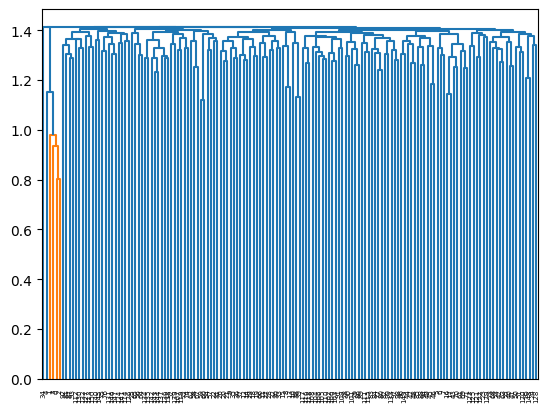

In [182]:
comp_linkage = hierarchy.linkage(tf_idf, method = 'complete')
hierarchy.dendrogram(comp_linkage)
plt.show()

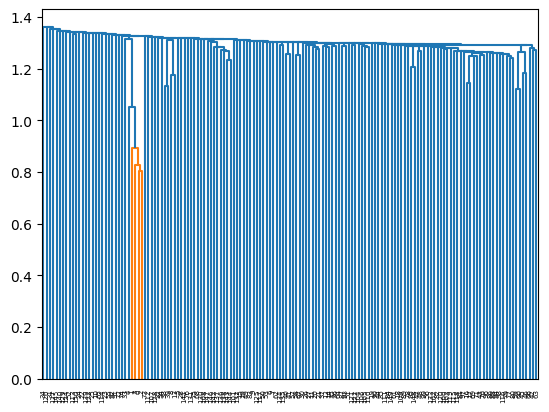

In [183]:
sing_linkage = hierarchy.linkage(tf_idf, method = 'single')
hierarchy.dendrogram(sing_linkage)
plt.show()

In [185]:
assignments = hierarchy.cut_tree(comp_linkage,height=1).T[0]

In [186]:
assignment_df = pd.DataFrame({'document_labels': document_labels, 'assignments': assignments})
assignment_df['book'] = assignment_df['document_labels'].str.split('_').str[0]

In [187]:
assignment_df

,document_labels,assignments,book
0,pyrates_24,0,pyrates
1,pyrates_26,0,pyrates
2,pyrates_30,0,pyrates
3,pyrates_34,0,pyrates
4,pyrates_46,1,pyrates
...,...,...,...
146,gt_618,143,gt
147,gt_624,144,gt
148,gt_636,145,gt
149,gt_640,146,gt


In [ ]:
result = assignment_df.groupby(['assignments', 'book']).size().reset_index(name='count')
result.sort_values('count', ascending=False)

,assignments,book,count
0,0,pyrates,4
1,1,pyrates,1
2,2,pyrates,1
3,3,pyrates,1
4,4,pyrates,1
...,...,...,...
143,143,gt,1
144,144,gt,1
145,145,gt,1
146,146,gt,1


### Try keeping stop words

In [209]:
pyrates_paragraph_dict = create_paragraph_dict(path = '../books/gen_history_of_the_pyrates.txt',
                                               lines_to_skip=52,
                                               book_title='pyrates',
                                               cut_num=400,
                                               remove_stop_words = False)
len(rc_paragraph_dict)

22

In [207]:
rc_paragraph_dict = create_paragraph_dict(path = '../books/robinson_crusoe.txt',
                                               lines_to_skip=12,
                                               book_title='rc',
                                               cut_num=400,
                                               remove_stop_words = False)
len(rc_paragraph_dict)

22

In [208]:
gt_paragraph_dict = create_paragraph_dict(path = '../books/gullivers_travels.txt',
                                               lines_to_skip=28,
                                               book_title='gt',
                                               cut_num=400,
                                               remove_stop_words = False)
len(gt_paragraph_dict)

37

In [221]:
corpus = list(pyrates_paragraph_dict.values())+list(rc_paragraph_dict.values())+list(gt_paragraph_dict.values())
tf_idf = determine_tf_idf_matrix(corpus=corpus)
# tf_idf = determine_custom_tf_idf_matrix(corpus=corpus)

In [218]:
dist_matrix = determine_distance_matrix(tf_idf=tf_idf)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.000000,1.677826,1.995328,2.064656,1.982648,1.970663,2.027510,2.071469,2.123445,2.032396,...,2.060496,2.057292,2.052211,2.039185,2.015027,2.077098,2.003323,2.022534,2.139152,2.087490
1,1.677826,0.000000,1.472451,1.569701,1.445904,1.408840,1.496837,1.530736,1.609478,1.479357,...,1.526245,1.518537,1.514137,1.504995,1.457058,1.545564,1.447607,1.466525,1.623835,1.562033
2,1.995328,1.472451,0.000000,1.313670,1.208211,1.165386,1.267540,1.316644,1.385877,1.244446,...,1.289010,1.288611,1.279690,1.257627,1.211627,1.311095,1.191343,1.222985,1.417018,1.318679
3,2.064656,1.569701,1.313670,0.000000,1.329357,1.289974,1.390984,1.424520,1.501031,1.325684,...,1.394231,1.399958,1.407150,1.395841,1.324344,1.418215,1.321061,1.350746,1.513209,1.445513
4,1.982648,1.445904,1.208211,1.329357,0.000000,1.134534,1.104164,1.297241,1.365594,1.237423,...,1.275620,1.242091,1.240282,1.237416,1.193685,1.296802,1.173985,1.203703,1.391790,1.299539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2.077098,1.545564,1.311095,1.418215,1.296802,1.240855,1.361919,1.390639,1.460584,1.315152,...,1.331460,1.332237,1.334699,1.331377,1.256086,0.000000,1.229357,1.262098,1.433575,1.367679
72,2.003323,1.447607,1.191343,1.321061,1.173985,1.121476,1.249121,1.289938,1.355049,1.210784,...,1.233008,1.225913,1.226008,1.209204,1.101887,1.229357,0.000000,1.082786,1.332185,1.230414
73,2.022534,1.466525,1.222985,1.350746,1.203703,1.151625,1.257624,1.307438,1.381129,1.244879,...,1.257639,1.251472,1.254521,1.238317,1.170308,1.262098,1.082786,0.000000,1.354849,1.239434
74,2.139152,1.623835,1.417018,1.513209,1.391790,1.345470,1.454983,1.491365,1.556411,1.424794,...,1.438305,1.438316,1.431933,1.426285,1.355107,1.433575,1.332185,1.354849,0.000000,1.460390


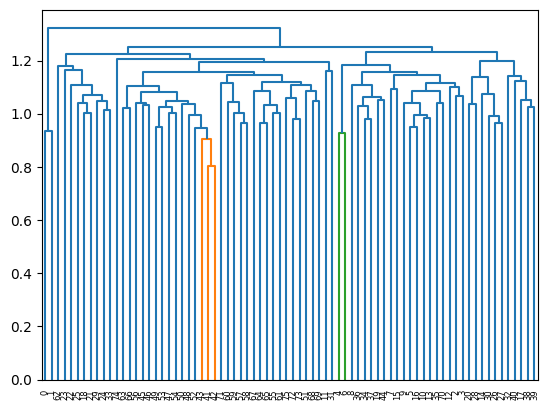

In [222]:
comp_linkage = hierarchy.linkage(tf_idf, method = 'complete')
hierarchy.dendrogram(comp_linkage)
plt.show()

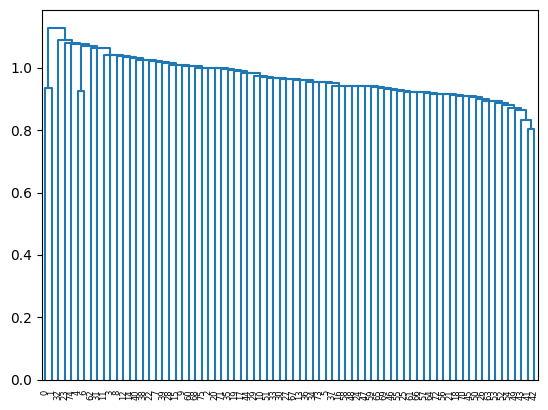

In [223]:
single_linkage = hierarchy.linkage(tf_idf, method = 'single')
hierarchy.dendrogram(single_linkage)
plt.show()

In [215]:
assignments = hierarchy.cut_tree(comp_linkage,height=1.2).T[0]
document_labels = list(pyrates_paragraph_dict.keys())+list(rc_paragraph_dict.keys())+list(gt_paragraph_dict.keys())
assignment_df = pd.DataFrame({'document_labels': document_labels, 'assignments': assignments})
assignment_df['book'] = assignment_df['document_labels'].str.split('_').str[0]


In [216]:
result = assignment_df.groupby(['assignments', 'book']).size().reset_index(name='count')
result.sort_values('count', ascending=False)

,assignments,book,count
4,2,gt,31
2,1,pyrates,13
11,4,rc,8
9,3,rc,8
3,1,rc,5
1,1,gt,2
0,0,pyrates,2
7,3,gt,2
5,2,pyrates,1
8,3,pyrates,1
